# **Employee Attrition**
Attrition, in the context of organizational management, signifies the natural and ongoing reduction in a company's workforce over time.
Employee atrrition occurs when an employee voluntarily leaves the organization, such as due to resignation, retirement, or any other circumstance. This may lead to a prolonged period of position vacancy until a replacement is hired, or the position itself might be eliminated as part of the organisation's restructuring efforts.

It impacts organizational stabilty, productivity, and overall employee satisfaction.

[1](https://explodingtopics.com/blog/employee-turnover-statistics)  The global employee attrition rate has been on the rise. Between 2013 and 2021, it almost doubled, indicating a substantial shift in workforce dynamics

 [2](https://www.mckinsey.com/capabilities/people-and-organizational-performance/our-insights/the-great-attrition-is-making-hiring-harder-are-you-searching-the-right-talent-pools)  In 2023, 45% of employees reported feeling burned out due to organizational changes


This project aims to conduct an in-depth analysis and visualization of the fundamental factors contributing to employee attrition, and to employ machine learning models to accurately predict attrition.

Kaggle Dataset [WA_Fn-UseC_-HR-Employee-Attrition](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
DF=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
DF.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
DF.shape

(1470, 35)

In [ ]:
#To check number of missing values in the dataset
DF.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#To check if there is a duplicate value in the dataset
DF.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

After analysing the data it is clear that the data does not contain any missing and duplicate records.Hence can be used to do further analysis.
But if the data would have contained Nan values the below given codes can be executed


* `DF.fillna(value=0)`
for replacing Nan value with 0
* `DF.drop_duplicates() `
for removing duplicate items

In [ ]:
DF.loc[0:10,['EmployeeCount','EmployeeNumber','StandardHours','Over18','StockOptionLevel']]

,EmployeeCount,EmployeeNumber,StandardHours,Over18,StockOptionLevel
0,1,1,80,Y,0
1,1,2,80,Y,1
2,1,4,80,Y,0
3,1,5,80,Y,0
4,1,7,80,Y,1
5,1,8,80,Y,0
6,1,10,80,Y,3
7,1,11,80,Y,1
8,1,12,80,Y,0
9,1,13,80,Y,2


In [ ]:
# Dropping Irrelevant columns
DF=DF.drop(["EmployeeCount","EmployeeNumber","StandardHours","Over18"],axis=1)

In [ ]:
DF.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#data of employee attrited
emp_attrited=DF[DF["Attrition"]=="Yes"]
emp_attrited

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,3,2,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,4,2,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,...,3,1,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,...,3,2,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,Male,...,3,4,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,...,3,4,2,12,3,3,6,3,0,1


In [ ]:
#data of employee attrited
emp_notattrited=DF[DF["Attrition"]=="No"]
emp_notattrited

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


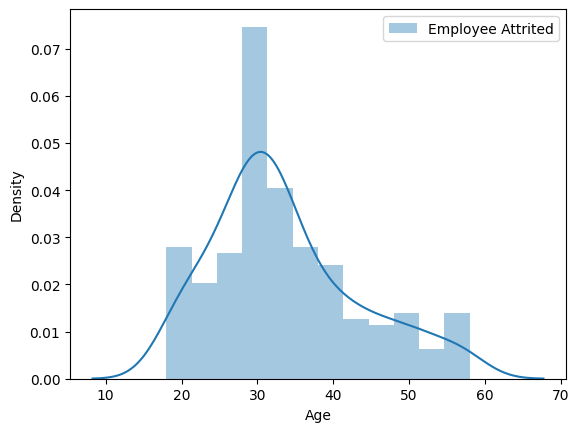

In [ ]:
#Densityplot to visualize age distribution among employees who have left the organization
sns.distplot(emp_attrited["Age"],hist=True,label="Employee Attrited")
plt.legend()
plt.show()

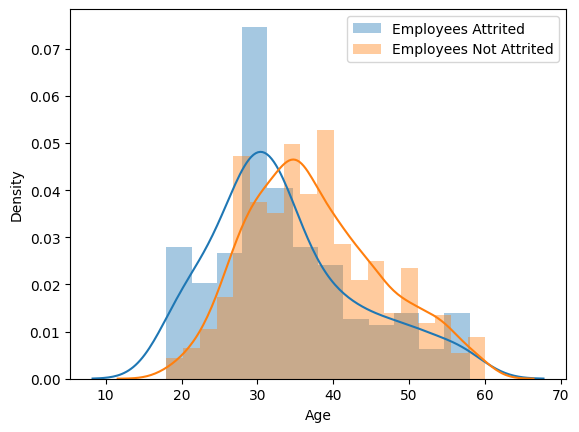

In [ ]:
#to visualize the age distribution and compare it with the overall employee population
sns.distplot(emp_attrited["Age"],hist=True,label="Employees Attrited")
sns.distplot(emp_notattrited["Age"],hist=True,label="Employees Not Attrited")
plt.legend()
plt.show()

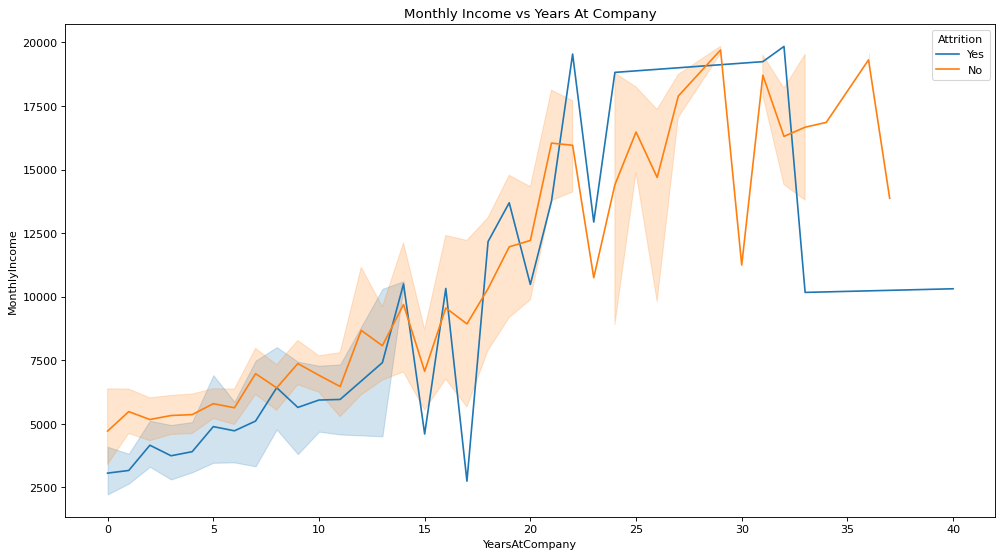

In [ ]:
#lineplot to visualise relationship between salary and years of experience among employees who have left?
plt.figure(figsize=(15,8),dpi=80)
sns.lineplot(DF,x="YearsAtCompany",y="MonthlyIncome",hue="Attrition",legend="full")
plt.title("Monthly Income vs Years At Company")
plt.show()

# Observation1
* It is clear from the above analysis that most people left from the age group of 28-35 years.
* The lineplot represents that employees having 16-17 and 32-40 years of experience have more monthly income than employees who have left

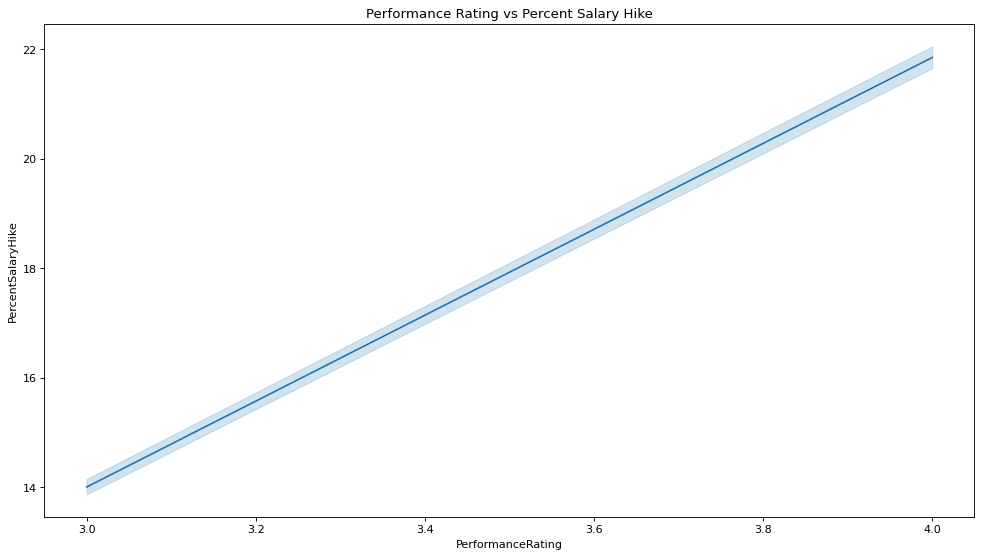

In [ ]:
plt.figure(figsize=(15,8),dpi=80)
sns.lineplot(DF,x="PerformanceRating",y="PercentSalaryHike")
plt.title("Performance Rating vs Percent Salary Hike")
plt.show()

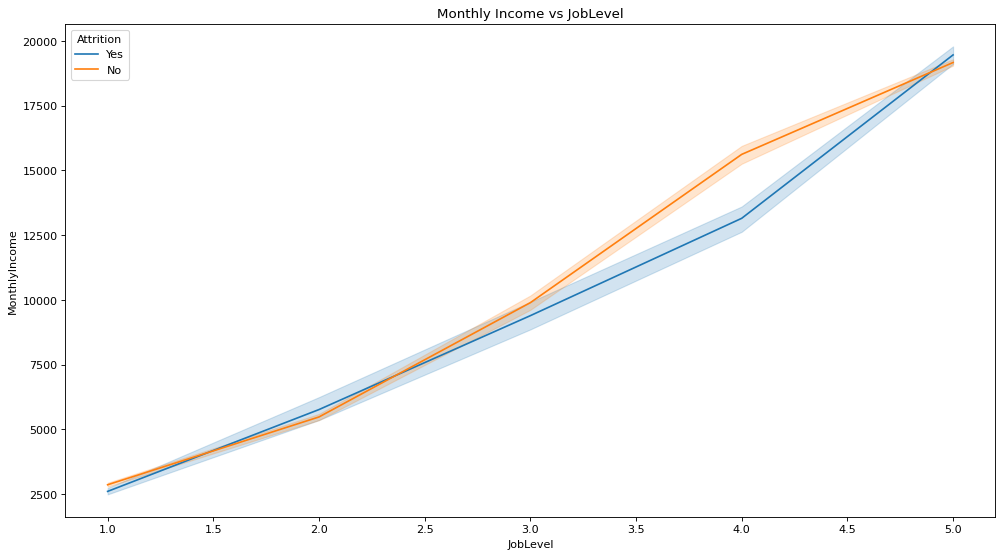

In [ ]:
#lineplot to visualise relationship between salary and years of experience among employees who have left?
plt.figure(figsize=(15,8),dpi=80)
sns.lineplot(DF,x="JobLevel",y="MonthlyIncome",hue="Attrition",legend="full")
plt.title("Monthly Income vs JobLevel")
plt.show()

<Axes: xlabel='MonthlyIncome', ylabel='Attrition'>

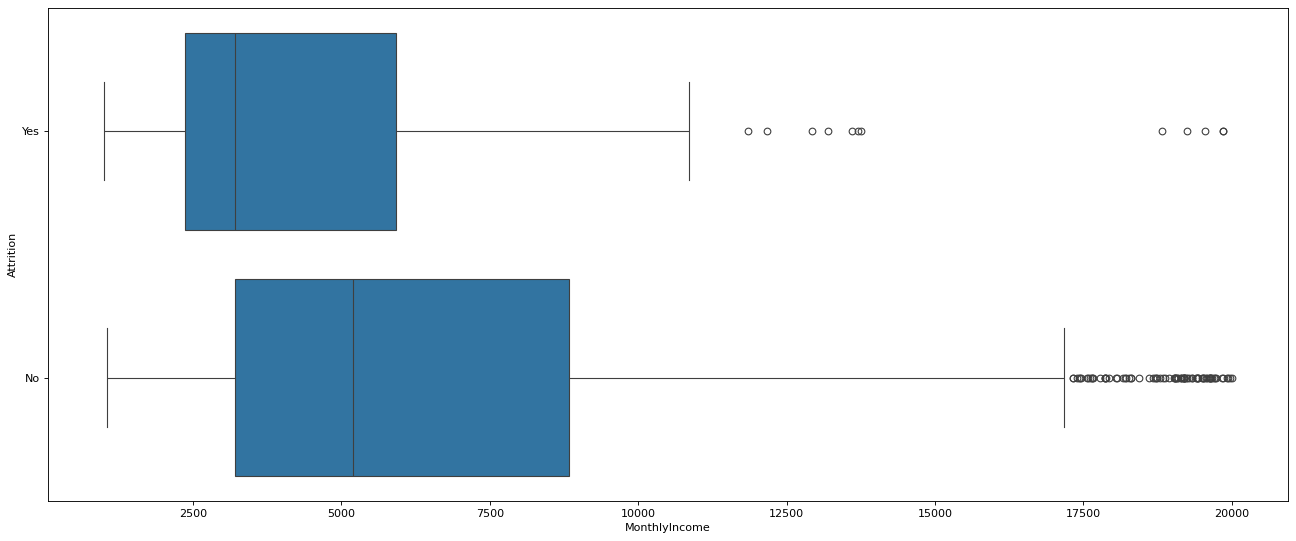

In [ ]:
plt.figure(figsize=(20,8),dpi=80)
sns.boxplot(x="MonthlyIncome",y="Attrition",data=DF)

In [ ]:
DF.loc[0:10,["Age","Education","EnvironmentSatisfaction","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","PerformanceRating","PercentSalaryHike","WorkLifeBalance","YearsAtCompany"]]

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PerformanceRating,PercentSalaryHike,WorkLifeBalance,YearsAtCompany
0,41,2,2,3,2,4,5993,3,11,1,6
1,49,1,3,2,2,2,5130,4,23,3,10
2,37,2,4,2,1,3,2090,3,15,3,0
3,33,4,4,3,1,3,2909,3,11,3,8
4,27,1,1,3,1,2,3468,3,12,3,2
5,32,2,4,3,1,4,3068,3,13,2,7
6,59,3,3,4,1,1,2670,4,20,2,1
7,30,1,4,3,1,3,2693,4,22,3,1
8,38,3,4,2,3,3,9526,4,21,3,9
9,36,3,3,3,2,3,5237,3,13,2,7


<Axes: >

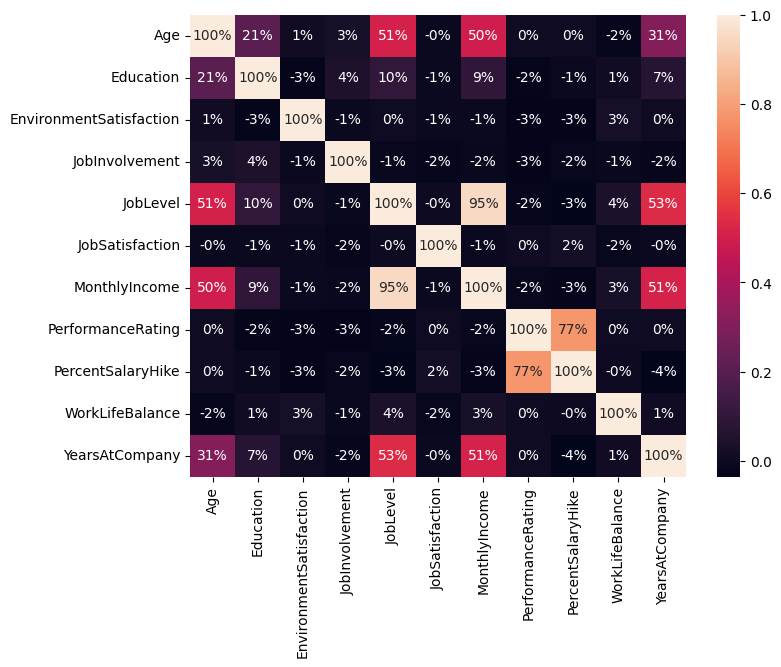

In [ ]:
#HeatMap to visualise correlation between specific independent variables
plt.figure(figsize=(8,6))
numeric_df = DF.select_dtypes(include=['number'])
corr=numeric_df.corr()
vars=["Age","Education","EnvironmentSatisfaction","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","PerformanceRating","PercentSalaryHike","WorkLifeBalance","YearsAtCompany"]
sns.heatmap(corr.loc[vars,vars],annot=True,fmt=".0%")

# Observation2
* There is a linear relationship between Performance Rating and Percent Salary Hike and almost a linear relationship between Monthly Income and Job level for employees left the organization
* Mean monthly income of employees attrited is around 2600 and employees not attrited is around 5100
* After analyzing the correlation plot, the following inferences have been concluded:   

1.   95% relationship between Monthly Income and Job level
2.   77% relationship between Performance Rating and Percent Salary Hike
3.   51% relationship between Years at Comapny and Monthly Income
4.   21% relationship between Age and Eduction





In [ ]:
#Scatter plot to visualize relationship between job application and performance ratings
import plotly.express as px
fig = px.scatter(DF, x="Age", y="MonthlyIncome", color="Attrition", trendline="ols")
fig.update_layout(title="Age vs. Monthly Income by Attrition")
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(DF, x="YearsInCurrentRole", y="MonthlyIncome", color="Attrition", trendline="ols")
fig.update_layout(title="YearsInCurrentRole vs. Monthly Income by Attrition")
fig.show()

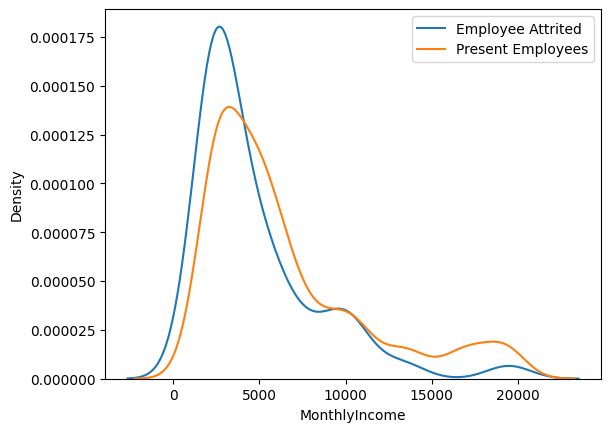

In [ ]:
# Density plot to visualise relationship between Monthly Income and Attrition
sns.distplot(emp_attrited["MonthlyIncome"],hist=False,label="Employee Attrited")
sns.distplot(DF["MonthlyIncome"],hist=False,label="Present Employees")
plt.legend()
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

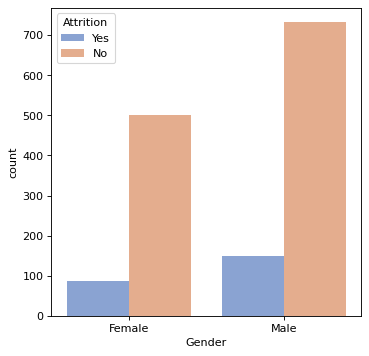

In [ ]:
#Countplot to visualise relationship between gender and attrition status
plt.figure(figsize=(5,5),dpi=80)
sns.countplot(x="Gender",hue="Attrition",alpha=0.7,palette="muted",data=DF)

<Axes: xlabel='EducationField', ylabel='count'>

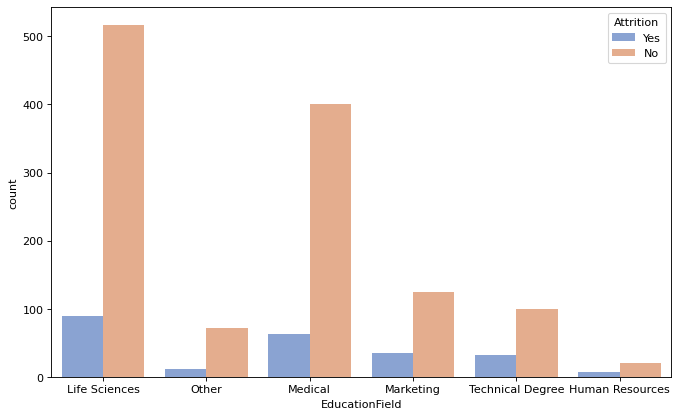

In [ ]:
#Countplot to visualise relationship between Education field and attrition status
plt.figure(figsize=(10,6),dpi=80)
sns.countplot(x="EducationField",hue="Attrition",alpha=0.7,palette="muted",data=DF)

<Axes: xlabel='TotalWorkingYears', ylabel='count'>

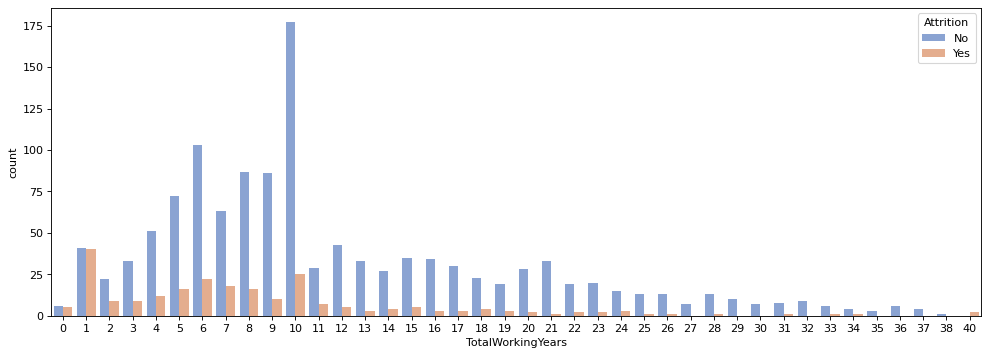

In [ ]:
#Countplot to visualise relationship between gender and attrition status
plt.figure(figsize=(15,5),dpi=80)
sns.countplot(x="TotalWorkingYears",hue="Attrition",alpha=0.7,palette="muted",data=DF)

<Axes: xlabel='PercentSalaryHike', ylabel='count'>

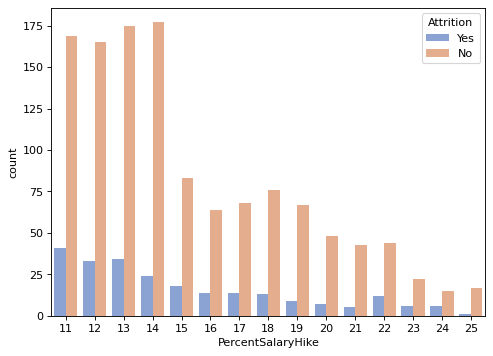

In [ ]:
#Countplot to visualise relationship between gender and attrition status
plt.figure(figsize=(7,5),dpi=80)
sns.countplot(x="PercentSalaryHike",hue="Attrition",alpha=0.7,palette="muted",data=DF)

<Axes: xlabel='count', ylabel='Attrition'>

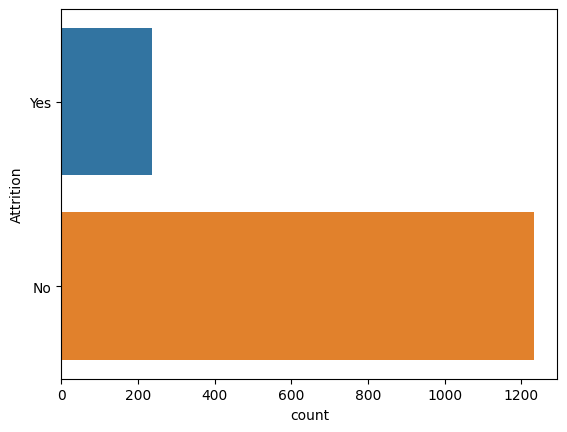

In [ ]:
sns.countplot(y="Attrition",data=DF,hue="Attrition")

In [ ]:
DF["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
#Attrition Rate
Attrition_rate=(237/(1233+237))*100
Attrition_rate

16.122448979591837

<Axes: xlabel='DistanceFromHome', ylabel='count'>

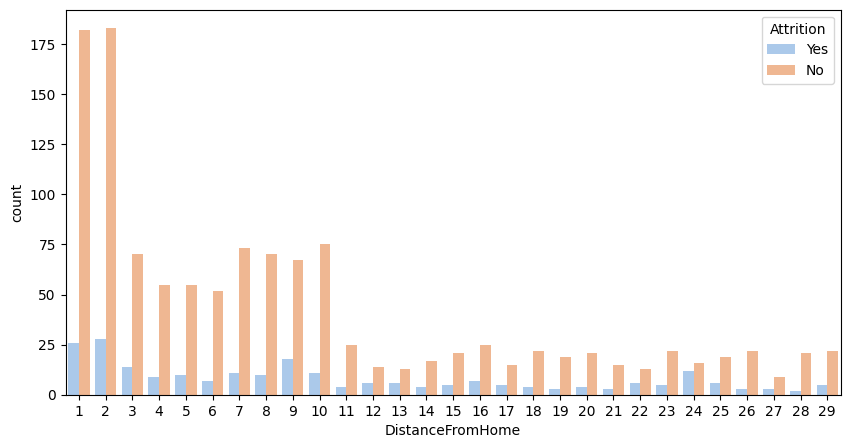

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="DistanceFromHome", hue="Attrition",data=DF,palette="pastel")

* Attrition rate is 16.12%
* Employees with less Total working years (1-10) have attrited
* Most employees attrited have monthly income between 2000-5000
* More males have been attrited as compared to females.
* Most employees with Education field Life Sciences have been attrited
* Living far is not a major aspect for employee attrition as we can see employees living near are more likely to attrited.





In [ ]:
#Feature Engineering
Data=pd.get_dummies(DF,columns=["BusinessTravel","Department","Education","EducationField","EnvironmentSatisfaction","Gender","JobInvolvement","JobLevel","JobRole","JobSatisfaction","MaritalStatus","PerformanceRating"])


In [ ]:
Data.head()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PerformanceRating_3,PerformanceRating_4
0,41,Yes,1102,1,94,5993,19479,8,Yes,11,...,False,False,False,False,True,False,False,True,True,False
1,49,No,279,8,61,5130,24907,1,No,23,...,False,False,True,False,False,False,True,False,False,True
2,37,Yes,1373,2,92,2090,2396,6,Yes,15,...,False,False,False,True,False,False,False,True,True,False
3,33,No,1392,3,56,2909,23159,1,Yes,11,...,False,False,False,True,False,False,True,False,True,False
4,27,No,591,2,40,3468,16632,9,No,12,...,False,False,True,False,False,False,True,False,True,False


In [ ]:
Attrition_num={"Attrition":{"Yes":1,"No":0},"OverTime":{"Yes":1,"No":0}}
Data.replace(Attrition_num,inplace=True)

In [ ]:
#Split dataset in the train-test(80:20)
from sklearn.model_selection import train_test_split
X=Data.drop(['Attrition'],axis=1)
y=Data["Attrition"]

In [ ]:
X_train,X_Test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(1176, 68)

In [ ]:
type(X_Test)

pandas.core.frame.DataFrame

In [ ]:
X_Test

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,...,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PerformanceRating_3,PerformanceRating_4
1041,28,866,5,84,8463,23490,0,0,18,4,...,False,True,False,False,False,False,False,True,True,False
184,53,1084,13,57,4450,26250,1,0,11,3,...,False,True,False,False,False,True,False,False,True,False
1222,24,240,22,58,1555,11585,1,0,11,3,...,False,False,False,True,False,False,True,False,True,False
67,45,1339,7,59,9724,18787,2,0,17,3,...,False,True,False,False,False,True,False,False,True,False
220,36,1396,5,62,5914,9945,8,0,16,4,...,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,34,304,2,60,6274,18686,1,0,22,3,...,False,False,False,False,True,False,False,True,False,True
560,34,167,8,32,5121,4187,3,0,14,3,...,False,True,False,False,False,True,False,False,True,False
945,50,1322,28,43,16880,22422,4,1,11,2,...,False,True,False,False,False,False,True,False,True,False
522,37,1225,10,80,4680,15232,3,0,17,1,...,False,False,False,False,True,False,False,True,True,False


In [ ]:
X_train

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,...,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PerformanceRating_3,PerformanceRating_4
1097,24,350,21,57,2296,10036,0,0,14,2,...,False,True,False,False,False,True,False,False,True,False
727,18,287,5,73,1051,13493,1,0,15,4,...,False,False,False,False,True,False,False,True,True,False
254,29,1247,20,45,6931,10732,2,0,14,4,...,False,False,False,False,True,True,False,False,True,False
1175,39,492,12,66,5295,7693,4,0,21,3,...,False,False,True,False,False,False,True,False,False,True
1341,31,311,20,89,4197,18624,1,0,11,1,...,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,750,28,46,3407,25348,1,0,17,4,...,False,False,False,True,False,False,True,False,True,False
1294,41,447,5,85,6870,15530,3,0,12,1,...,False,False,True,False,False,False,False,True,True,False
860,22,1256,3,48,2853,4223,0,1,11,2,...,False,False,False,False,True,False,True,False,True,False
1459,29,1378,13,46,4025,23679,4,1,13,1,...,False,False,True,False,False,False,True,False,True,False


In [ ]:
y_train

1097    0
727     0
254     0
1175    0
1341    0
       ..
1130    0
1294    0
860     1
1459    0
1126    0
Name: Attrition, Length: 1176, dtype: int64

In [ ]:
y_test

1041    0
184     0
1222    1
67      0
220     0
       ..
567     0
560     0
945     0
522     0
651     0
Name: Attrition, Length: 294, dtype: int64

In [ ]:
# Selection of Model
from sklearn.linear_model import LogisticRegression

In [ ]:
# Model Training
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Model Prediction
y_prediction=model.predict(X_Test)

In [ ]:
# Model Evaluation
model.score(X_Test,y_test)

0.8707482993197279

In [ ]:
accuracy1=model.score(X_Test,y_test)
accuracy1

0.8707482993197279

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



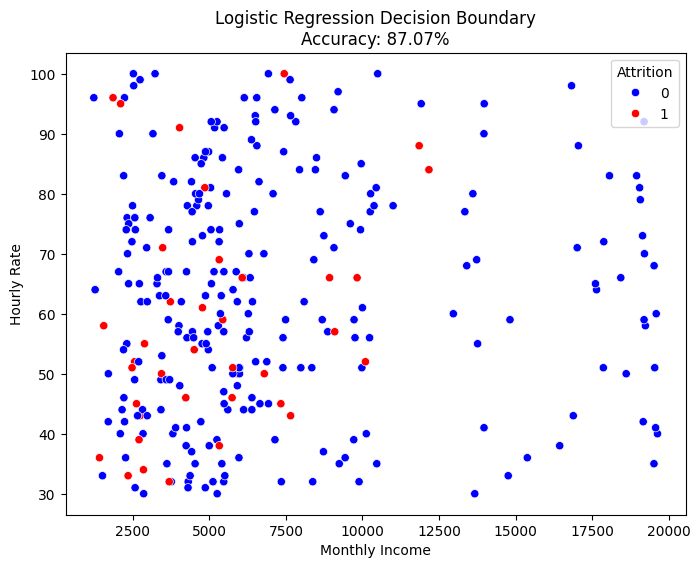

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_Test.iloc[:, 4], y=X_Test.iloc[:, 3], hue=y_test, palette={
                0: 'blue', 1: 'red'}, marker='o')
plt.xlabel('Monthly Income')
plt.ylabel('Hourly Rate')
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
    accuracy1 * 100))
plt.legend(title="Attrition", loc="upper right")
plt.show()

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_prediction)
cnf_matrix

array([[255,   0],
       [ 38,   1]])

Text(0.5, 427.9555555555555, 'Predicted label')

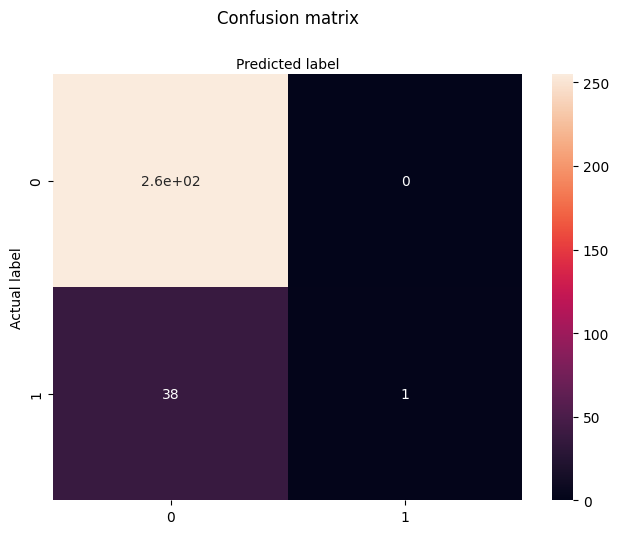

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model1.score(X_Test,y_test)

0.7789115646258503

In [ ]:
y_prediction=model1.predict(X_Test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       255
           1       0.19      0.21      0.20        39

    accuracy                           0.78       294
   macro avg       0.53      0.54      0.53       294
weighted avg       0.79      0.78      0.78       294



In [ ]:
from sklearn import tree
text_representation = tree.export_text(model1)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_11 <= 1.50
|   |   |--- feature_19 <= 0.50
|   |   |   |--- feature_1 <= 249.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  249.50
|   |   |   |   |--- feature_13 <= 2.50
|   |   |   |   |   |--- feature_2 <= 8.00
|   |   |   |   |   |   |--- feature_66 <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_66 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  8.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_13 >  2.50
|   |   |   |   |   |--- feature_31 <= 0.50
|   |   |   |   |   |   |--- feature_5 <= 24318.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_5 >  24318.50
|   |   |   |   |   |   |   |--- feature_37 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_37 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_31 >  0.50
|

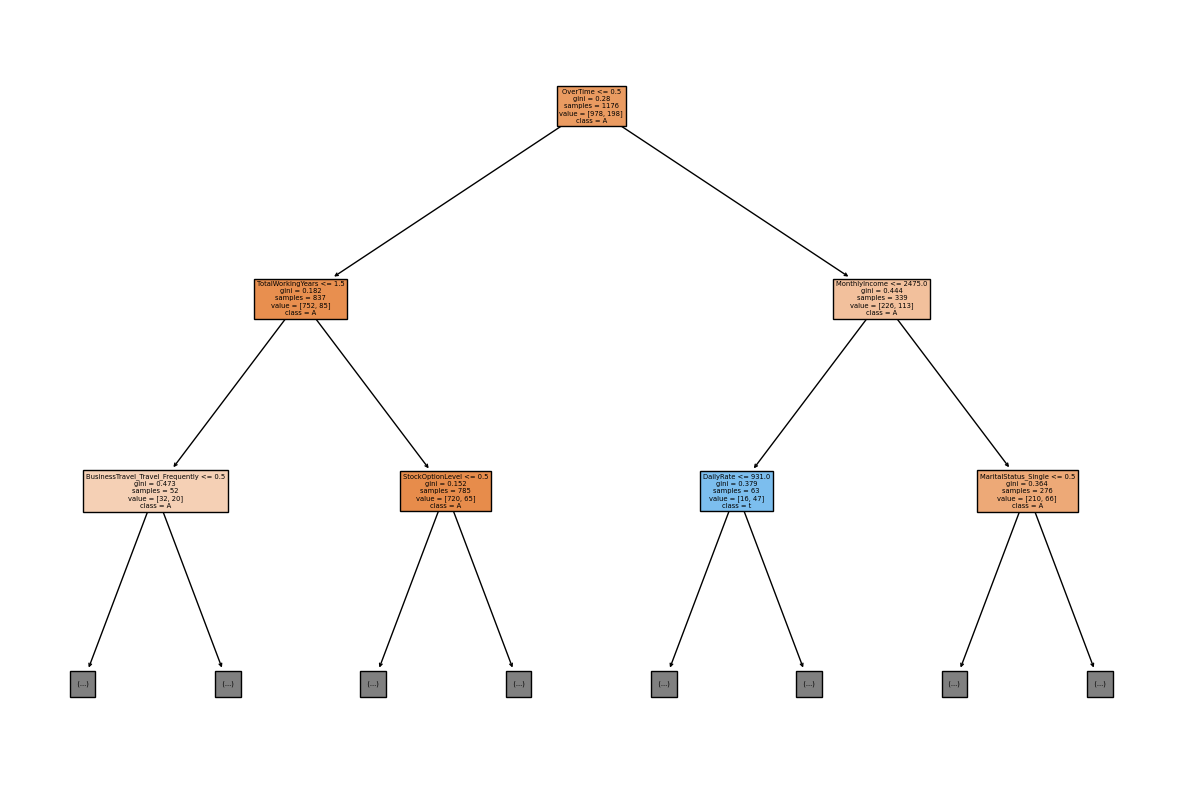

In [ ]:
fig = plt.figure(figsize=(15,10))
feature_names = X.columns
class_names = y.name if isinstance(y, pd.Series) else y
tree.plot_tree(model1, max_depth = 2 ,feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [ ]:
from sklearn import metrics
cnf_matrix1 = metrics.confusion_matrix(y_test,y_prediction)
cnf_matrix1

array([[221,  34],
       [ 31,   8]])

Text(0.5, 427.9555555555555, 'Predicted label')

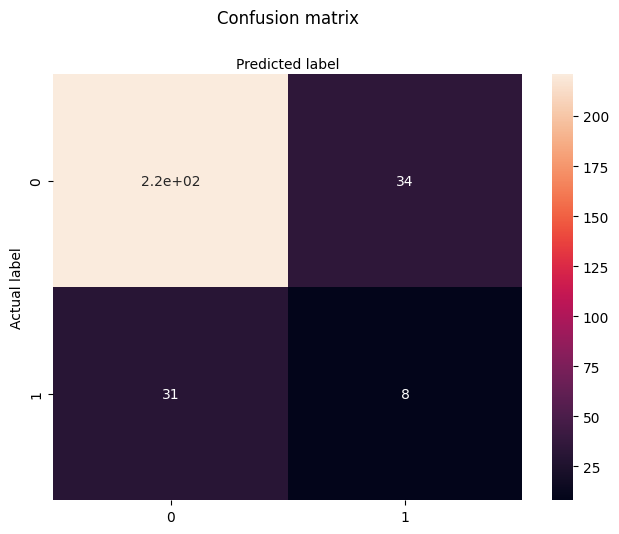

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
model2.score(X_Test,y_test)

0.8775510204081632

In [ ]:
y_prediction=model2.predict(X_Test)

In [ ]:
accuracy=model2.score(X_Test,y_test)
accuracy

0.8775510204081632

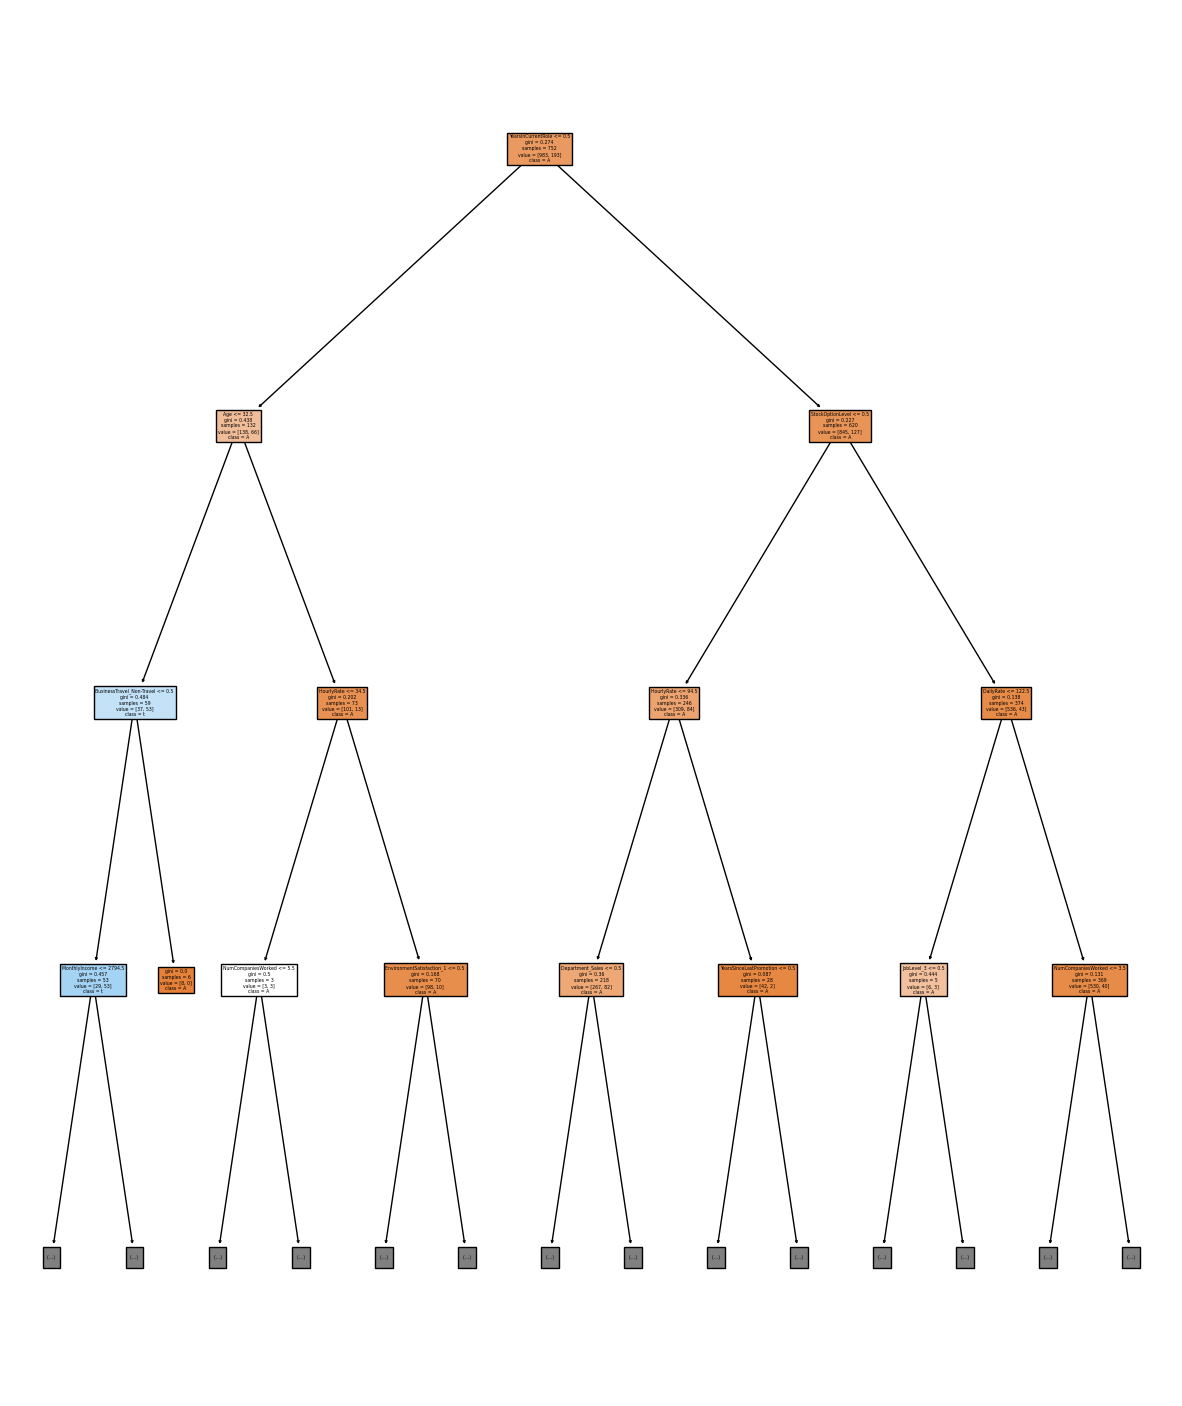

In [ ]:
fig = plt.figure(figsize=(15,18))
feature_names = X.columns
class_names = y.name if isinstance(y, pd.Series) else y
tree.plot_tree(model2.estimators_[1], max_depth = 3 ,feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [ ]:
from sklearn import metrics
cnf_matrix2 = metrics.confusion_matrix(y_test,y_prediction)
cnf_matrix2

array([[254,   1],
       [ 35,   4]])

Text(0.5, 427.9555555555555, 'Predicted label')

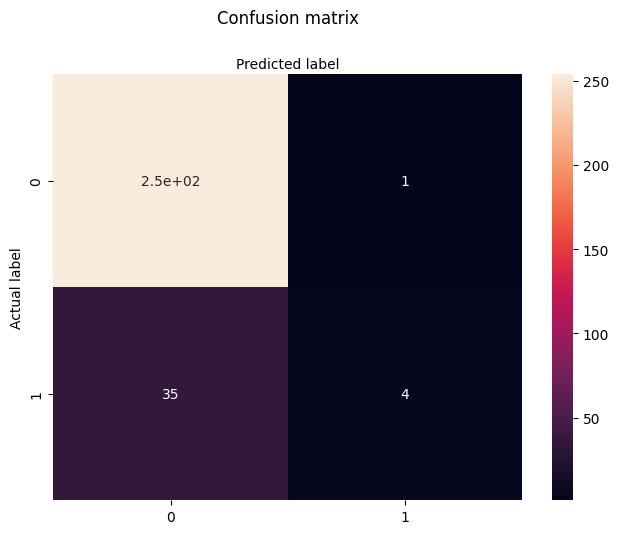

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn import neighbors
model3=neighbors.KNeighborsClassifier()
model3.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
model3.score(X_Test,y_test)

0.8469387755102041

In [ ]:
y_prediction=model3.predict(X_Test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.31      0.13      0.18        39

    accuracy                           0.85       294
   macro avg       0.60      0.54      0.55       294
weighted avg       0.80      0.85      0.82       294



In [ ]:
from sklearn import metrics
cnf_matrix3 = metrics.confusion_matrix(y_test,y_prediction)
cnf_matrix3

array([[244,  11],
       [ 34,   5]])

Text(0.5, 427.9555555555555, 'Predicted label')

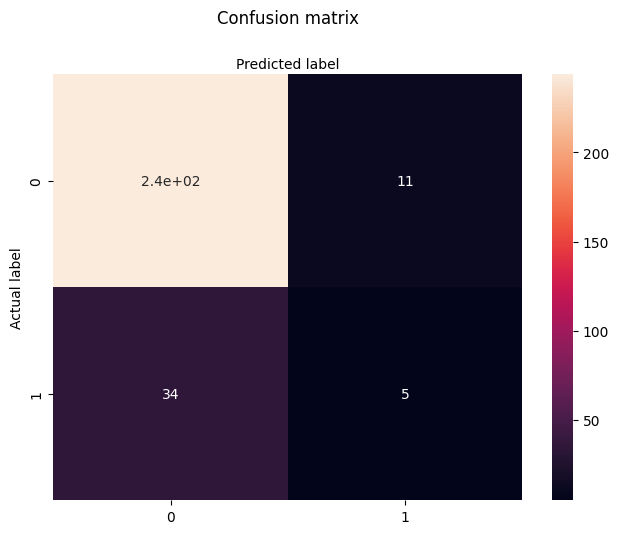

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

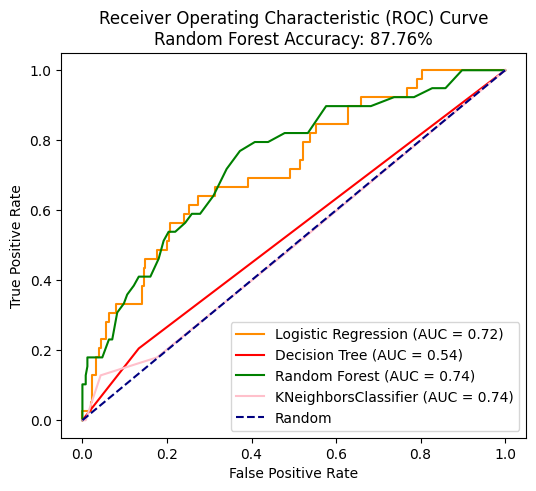

In [ ]:
from sklearn.metrics import roc_curve,auc
y_prob = model.predict_proba(X_Test)
y_prob1 = model1.predict_proba(X_Test)
y_prob2 = model2.predict_proba(X_Test)
y_prob3 = model3.predict_proba(X_Test)
#y_prob4 = model4.predict_proba(X_Test)


fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1],pos_label=1)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_prob1[:,1],pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_prob2[:,1],pos_label=1)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_prob3[:,1],pos_label=1)
#fpr4, tpr4, thresholds4 = roc_curve(y_test, y_prob4[:,1],pos_label=1)

roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot(fpr1, tpr1, color='red', label='Decision Tree (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='green', label='Random Forest (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='pink', label='KNeighborsClassifier (AUC = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nRandom Forest Accuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()

Random Forest has the highest accuracy of 87.75% followed by 87.07% Logistic Regression